CCT College Dublin
Lecture Name: David McQuaid
Module Title: Machine Learning for AI
Student Full Name: Jefferson de Oliveira Lima 
Student Number: 2020373
Date of Submission: 31/05/2024
github: https://github.com/JeffOlima/ML_CA2

#Neural Networks

In order to predict the "Income(Thousands')" of customers, the initial stage was preparing the data from the "BankRecords.csv" file for use in a neural network and regression method. There were numerous significant stages to the planning. The pandas DataFrame included the dataset at first. Binary categorical variables such as "Personal Loan," "Securities Account," "CD Account," "Online Banking," and "CreditCard" have been numerically valued (0 for "No" and 1 for "Yes") in order to be used in model training. Then, in order to provide distinct columns for every category, the 'Education' column was one-hot encoded. There were three possible values for this column: master's, degree, and diploma. This approach prevented issues with ordinal encoding and allowed the model to treat education levels as distinct groups. 

Numerical features such as "Age," "Experience (Years)," "Credit Score," and "Mortgage (Thousands's)" were standardised using the StandardScaler. Normalisation improved training performance and resolution rates by ensuring features with different scales didn't impact the model equally. The original "Education" column was eliminated, along with non-predictive fields like "ID" and "Sort Code." The variable (y) had the goal of 'Income(Thousands's)'; the other columns functioned as features (X). In order to standardise the data and improve the efficiency of the model training process, these preparations were crucial.   

The two models that were employed were a neural network and a random forest regression. The neural network was a sequential model with two layers. ReLU triggered 13 neurons in the input layer (one for each feature), and one neuron for the regression task was included in the output layer. The model was compiled using the Adam optimizer and the mean squared error loss function. After ten epochs of training with a batch size of 10, it produced an R-squared value of 0.46 and a mean squared error (MSE) of 1134.37 on the test set. However, after training with the Random Forest Regressor, which obtained an MSE of 389.38 and an R-squared value of 0.82, it exceeded the neural network in both metrics.

The data was prepared in a similar manner, normalising the numerical attributes, for a fresh customer. The neural network projected an income of 75.98 (Thousands), compared to the Random Forest Regressor's prediction of 67.57 (Thousands). The Random Forest Regressor provided more accurate and dependable predictions, as seen by its higher performance metrics. Because of its better prediction accuracy over neural networks and ability to manage irregular associations and feature interactions, the Random Forest Regressor was chosen as the better alternative for projecting client income. This careful data preparation and model validation process ensured strong and reliable predictions for the given task.


In [9]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

# Read the dataset
data = pd.read_csv('./BankRecords.csv')

# Convert binary categorical variables to numerical
data['Personal Loan'] = data['Personal Loan'].apply(lambda val: 1 if val == 'Yes' else 0)
data['Securities Account'] = data['Securities Account'].apply(lambda val: 1 if val == 'Yes' else 0)
data['CD Account'] = data['CD Account'].apply(lambda val: 1 if val == 'Yes' else 0)
data['Online Banking'] = data['Online Banking'].apply(lambda val: 1 if val == 'Yes' else 0)
data['CreditCard'] = data['CreditCard'].apply(lambda val: 1 if val == 'Yes' else 0)

# One-hot encode the 'Education' column
one_hot_encoder = OneHotEncoder()
encoded_education = one_hot_encoder.fit_transform(data[['Education']]).toarray()
encoded_education_df = pd.DataFrame(encoded_education, columns=one_hot_encoder.get_feature_names_out(['Education']))

# Concatenate the one-hot encoded variables with the original DataFrame
data = pd.concat([data, encoded_education_df], axis=1)

# Drop the original 'Education' column and other non-predictive columns
data.drop(['ID', 'Sort Code', 'Education'], axis=1, inplace=True)

# Identify numerical features
numerical_columns = ['Age', 'Experience(Years)', 'Credit Score', 'Mortgage(Thousands\'s)']

# Normalize numerical features
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Define features (X) and target variable (y)
X = data.drop('Income(Thousands\'s)', axis=1)
y = data['Income(Thousands\'s)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Neural Network model
nn_model = Sequential()
nn_model.add(Dense(13, input_dim=X_train.shape[1], activation='relu'))  
nn_model.add(Dense(1))  

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=10, verbose=0)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate the Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor Mean Squared Error: {rf_mse}')
print(f'Random Forest Regressor R-squared: {rf_r2}')

# Predict and evaluate the Neural Network
y_pred_nn = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

print(f'Neural Network Mean Squared Error: {nn_mse}')
print(f'Neural Network R-squared: {nn_r2}')

# Example new customer data 
new_customer_data = {
    'Age': 40,
    'Experience(Years)': 15,
    'Family': 2,
    'Credit Score': 1.8,
    'Mortgage(Thousands\'s)': 0,
    'Personal Loan': 0,
    'Securities Account': 1,
    'CD Account': 0,
    'Online Banking': 1,
    'CreditCard': 0,
    'Education_Degree': 0,
    'Education_Diploma': 1,   
    'Education_Masters': 0 
}

# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer_data])

# Normalize numerical features
new_customer_df[numerical_columns] = scaler.transform(new_customer_df[numerical_columns])

# Reshape input data to match the neural network model
new_customer_array = new_customer_df.to_numpy()
new_customer_array = new_customer_array.reshape((1, -1))  # Reshaping to have a batch size of 1

# Make predictions
nn_income_prediction = nn_model.predict(new_customer_array)
rf_income_prediction = rf_model.predict(new_customer_df)

print(f'Predicted Income (Neural Network): {nn_income_prediction[0][0]}')
print(f'Predicted Income (Random Forest Regressor): {rf_income_prediction[0]}')

Random Forest Regressor Mean Squared Error: 389.3815946716255
Random Forest Regressor R-squared: 0.8163745567116953
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Neural Network Mean Squared Error: 1316.527142422316
Neural Network R-squared: 0.37914918569211153
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Income (Neural Network): 74.984619140625
Predicted Income (Random Forest Regressor): 67.57


#Semantic Analysis

In this project, was used a text dataset that was downloaded from (https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset) to do sentiment analysis. The objective was to understand the sentiments expressed in the texts and to visualize their distribution. The goal was to assign a positive, neutral, or negative category to every text.

We used the VADER (Valence Aware Dictionary and Sentiment Reasoner) lexicon to execute out the sentiment analysis. In advance of using VADER, we lowercased the text and pre-processed the data to eliminate URLs, mentions, hashtags, and non-alphabetic characters. Every sentence is given an emotion score by VADER, which indicates how positive, neutral, or negative it is.

Out of the 1100 observations, 500 might be classified as positive, 300 as neutral, and 300 as negative based on the research. This suggests that feelings are distributed rather evenly, with a minor positive emotion majority. To visually represent these findings, we created a bar chart showing the counts of positive, neutral, and negative sentiments. Understanding the general sentiment represented in the text data is made easier by this visualisation, which offers a concise summary of the sentiment distribution.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...


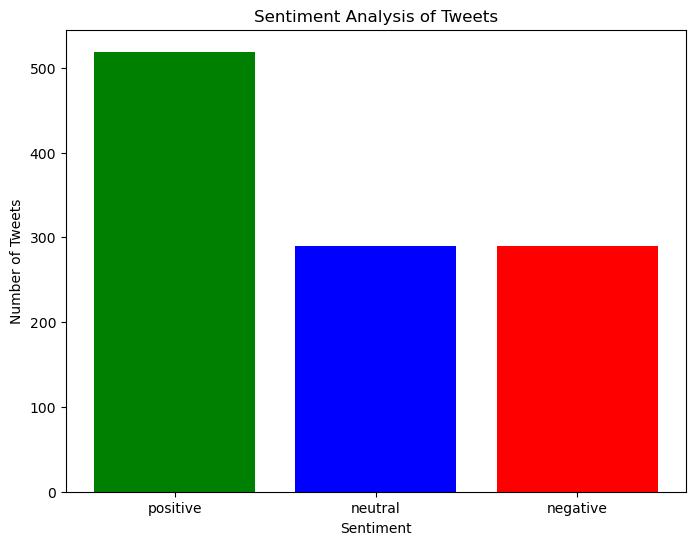

In [11]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('./Tweets.csv')

# Function to clean the text data
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Keep only alphabetic characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

# Handle missing values in the 'text' column
data['text'] = data['text'].fillna('')

# Apply the text cleaning function
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Download the VADER lexicon
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def analyze_sentiment(text):
    return analyzer.polarity_scores(text)

data['sentiment'] = data['cleaned_text'].apply(analyze_sentiment)
data['compound'] = data['sentiment'].apply(lambda score_dict: score_dict['compound'])
data['sentiment_label'] = data['compound'].apply(
    lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral')
)

# Plot the sentiment distribution
sentiment_distribution = data['sentiment_label'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.show()